# 05/06

＊ 調整參數：numbers of LSTM layers

(參考目標：accuracy, f1 score, recall)

# Import packages and Datasets

In [1]:
import pandas as pd 
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

import gc #Garbage Collector interface
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import sklearn.metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score #The F-Measure is a popular metric for imbalanced classification.
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# import Google Drive 套件
from google.colab import drive

# 將自己的雲端硬碟掛載上去
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
# 透過 gdrive/My Drive/... 來存取檔案
data_df = pd.read_excel('gdrive/My Drive/金融科技Final_project/ckiptagger_data.xlsx')

In [4]:
data_df.head()

,個股代號,公司簡稱,事件日,TCRI(年/月),事件強度,大事件類別,小事件類別,事件內容,content_tokenized
0,1218,泰山,20190101,6(2018/09),0,M_經營層,MT06_高管異動,發言人林俐婉內部調動由江巍峰接任,發言人 林俐婉 內部 調動 由 江巍峰 接任
1,1503,士電,20190101,4(2018/09),0,M_經營層,MT06_高管異動,內部稽核主管林志強內部調動由莊文清接任,內部 稽核 主管 林志強 內部 調動 由 莊文清 接任
2,1504,東元,20190101,4(2018/09),0,M_經營層,MT06_高管異動,會計主管藍俊雄內部調動由林鴻名接任,會計 主管 藍俊雄 內部 調動 由 林鴻名 接任
3,1709,和益,20190101,5(2018/09),0,M_經營層,MT06_高管異動,內部稽核主管游本詮內部調動由曾筱茜接任,內部 稽核 主管 游本詮 內部 調動 由 曾筱茜 接任
4,1721,三晃,20190101,7(2018/09),0,M_經營層,MT06_高管異動,財務經理洪廷宜內部調動由王婷渝接任,財務 經理 洪廷宜 內部 調動 由 王婷渝 接任


In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23703 entries, 0 to 23702
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   個股代號               23703 non-null  int64 
 1   公司簡稱               22775 non-null  object
 2   事件日                23703 non-null  int64 
 3   TCRI(年/月)          23703 non-null  object
 4   事件強度               23703 non-null  int64 
 5   大事件類別              23703 non-null  object
 6   小事件類別              23703 non-null  object
 7   事件內容               23703 non-null  object
 8   content_tokenized  23703 non-null  object
dtypes: int64(3), object(6)
memory usage: 1.6+ MB


# Data preprocessing

In [0]:
import keras
MAX_NUM_WORDS = 10000
tokenizer = keras .preprocessing.text.Tokenizer(num_words=MAX_NUM_WORDS)

corpus = data_df.content_tokenized

In [7]:
corpus

0                                   發言人 林俐婉 內部 調動 由 江巍峰 接任
1                              內部 稽核 主管 林志強 內部 調動 由 莊文清 接任
2                                 會計 主管 藍俊雄 內部 調動 由 林鴻名 接任
3                              內部 稽核 主管 游本詮 內部 調動 由 曾筱茜 接任
4                                 財務 經理 洪廷宜 內部 調動 由 王婷渝 接任
                               ...                        
23698    2018年 09月 累計 營收 1496639千 元 年增 1622018年 09月 單月 ...
23699                       20191231 收盤價 3500 元 月 報酬 下跌 43
23700    世界 先進 評估 跨足 晶圓 薄化 領域 搶進 晶圓 薄化 市場 機率 高晶圓 薄化 是 晶...
23701    1 雷虎 科技 與 香港 中澤 文化 投資 股份 有限公司 仲裁 案號 補充 公告 雷虎 科...
23702    商億 KY 公告 董事會 為 配合 柬埔寨 孫 公司 發展 需求 擬 透過 子公司 Shay...
Name: content_tokenized, Length: 23703, dtype: object

In [8]:
tokenizer.fit_on_texts(corpus)

x = tokenizer.texts_to_sequences(corpus)

len(x)

x[:1]

for seq in x[:1]:
    print([tokenizer.index_word[idx] for idx in seq])
    
for seq in x[:20]:
    print(len(seq), seq[:5], ' ...')
    
max_seq_len = max([
    len(seq) for seq in x])

max_seq_len

MAX_SEQUENCE_LENGTH = 1000

['發言人', '內部', '調動', '由', '接任']
5 [405, 68, 128, 23, 76]  ...
7 [68, 358, 133, 68, 128]  ...
6 [292, 133, 68, 128, 23]  ...
7 [68, 358, 133, 68, 128]  ...
6 [94, 426, 68, 128, 23]  ...
6 [239, 133, 68, 128, 23]  ...
8 [217, 196, 23, 76, 405]  ...
13 [422, 24, 63, 6, 4874]  ...
6 [504, 24, 63, 50, 6]  ...
5 [217, 68, 128, 23, 76]  ...
5 [217, 68, 128, 23, 76]  ...
196 [2790, 760, 2040, 1228, 21]  ...
17 [422, 24, 63, 6, 6512]  ...
6 [292, 133, 68, 128, 23]  ...
6 [94, 426, 68, 128, 23]  ...
6 [292, 133, 68, 128, 23]  ...
5 [217, 68, 128, 23, 76]  ...
7 [239, 133, 68, 128, 23]  ...
5 [217, 68, 128, 23, 76]  ...
5 [217, 68, 128, 23, 76]  ...


In [0]:
x = keras .preprocessing .sequence .pad_sequences(x, maxlen=MAX_SEQUENCE_LENGTH)

# Model building: Predict intensity

In [0]:
y = data_df["事件強度"]

## Split data into training dataset and testing dataset

In [0]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

## We have the issue of imbalanced data

In [12]:
y_train.value_counts()

-1    8557
 0    6722
 1    2807
-2     521
-3     219
 2      76
 3      60
Name: 事件強度, dtype: int64

## Visualize the distribution of each target class

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20107 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20214 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24375 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 24230 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20107 missing from current font.
  font.set_text(s, 0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 20214 missing from current font.
  font.set_te

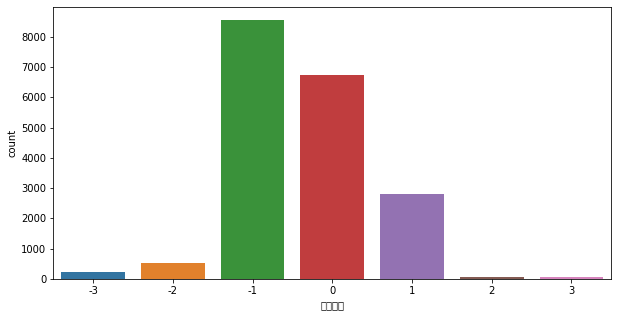

In [13]:
plt.figure(figsize=(10,5))
sns.countplot(y_train)

## Encode target variable

In [0]:
enc = OneHotEncoder(sparse=False)
y_train = enc.fit_transform(np.asarray(y_train).reshape(-1, 1))
y_test = enc.transform(np.asarray(y_test).reshape(-1, 1))

## Oversampleing

In [15]:
# Oversampling
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_train_res, y_train_res = ros.fit_resample(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


# Model 1 
1 LSTM layer

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 47919 samples, validate on 11980 samples
Epoch 1/10
47919/47919 [==============================] - 156s 3ms/step - loss: 0.6906 - accuracy: 0.7717 - val_loss: 3.4482 - val_accuracy: 0.2907
Epoch 2/10
47919/47919 [==============================] - 159s 3ms/step - loss: 0.1413 - accuracy: 0.9504 - val_loss: 1.2957 - val_accuracy: 0.3955
Epoch 3/10
47919/47919 [==============================] - 157s 3ms/step - loss: 0.0905 - accuracy: 0.9711 - val_loss: 0.9984 - val_accuracy: 0.7746
Epoch 4/10
47919/47919 [==============================] - 155s 3ms/step - loss: 0.0527 - accuracy: 0.9845 - val_loss: 0.3809 - val_accuracy: 0.9296
Epoch 5/10
47919/47919 [==============================] - 153s 3ms/step - loss: 0.0366 - accuracy: 0.9888 - val_loss: 0.2291 - val_accuracy: 0.9665
Epoch 6/10
47919/47919 [==============================] - 153s 3ms/step - loss: 0.0293 - accuracy: 0.9919 - val_loss: 0.1425 - val_accuracy: 1.0000
Epoch 7/10
47919/47919 [==============================] - 152s

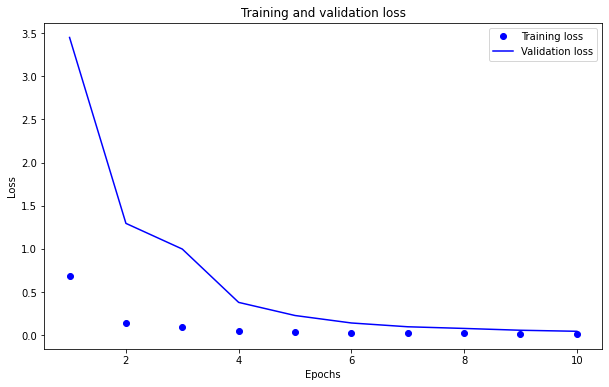

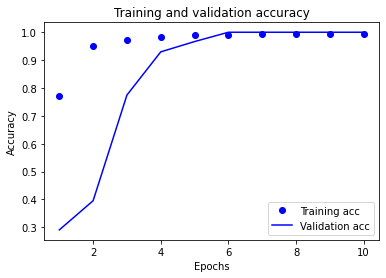

In [20]:
# Build our neural network model with LSTM

from keras import models
from keras import layers

max_features = 25000

from keras.layers import LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 256))
model.add(layers.LSTM(128))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Iterate on your training data by calling the fit() method of your model
history = model.fit(X_train_res, y_train_res,
                    epochs=10,
                    batch_size=500,
                   validation_split=0.2)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plot the results of accuracy from the training set and validtion set
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Performance on training set

In [21]:
preds_Y_train = model.predict(X_train)
preds_Y_train =(preds_Y_train>0.5).astype(int)

preds_Y_train = enc.inverse_transform(preds_Y_train)
y_train = enc.inverse_transform(y_train)

accuracy = accuracy_score(y_train, preds_Y_train)
precision = precision_score(y_train, preds_Y_train,average=None) # average=None: The precision scores for each class are returned
recall = recall_score(y_train, preds_Y_train,average=None)
f1 = f1_score(y_train, preds_Y_train,average=None)
c_matrix = confusion_matrix(y_train, preds_Y_train,labels=[-3,-2,-1,0,1,2,3])
print('accuracy: '+str(accuracy)+'\n')
print('precision: '+str(precision)+'\n')
print('recall: '+str(recall)+'\n')
print('F1 score: '+str(f1)+'\n')
print('Confusion matrix: ')
print(c_matrix)

accuracy: 0.9922476532011392

precision: [0.97333333 0.98481973 0.99519569 0.99223533 0.98627727 0.98701299
 1.        ]

recall: [1.         0.99616123 0.99252074 0.98854508 0.99857499 1.
 1.        ]

F1 score: [0.98648649 0.99045802 0.99385642 0.99038677 0.99238803 0.99346405
 1.        ]

Confusion matrix: 
[[ 219    0    0    0    0    0    0]
 [   0  519    2    0    0    0    0]
 [   6    4 8493   48    5    1    0]
 [   0    4   39 6645   34    0    0]
 [   0    0    0    4 2803    0    0]
 [   0    0    0    0    0   76    0]
 [   0    0    0    0    0    0   60]]


## Performance on testing set

In [22]:
preds_Y_test = model.predict(X_test)
preds_Y_test =(preds_Y_test>0.5).astype(int)

preds_Y_test = enc.inverse_transform(preds_Y_test)
y_test = enc.inverse_transform(y_test)

accuracy = accuracy_score(y_test, preds_Y_test)
precision = precision_score(y_test, preds_Y_test,average=None) # average=None: The precision scores for each class are returned
recall = recall_score(y_test, preds_Y_test,average=None)
f1 = f1_score(y_test, preds_Y_test,average=None)
c_matrix = confusion_matrix(y_test, preds_Y_test,labels=[-3,-2,-1,0,1,2,3])
print('accuracy: '+str(accuracy)+'\n')
print('precision: '+str(precision)+'\n')
print('recall: '+str(recall)+'\n')
print('F1 score: '+str(f1)+'\n')
print('Confusion matrix: ')
print(c_matrix)

accuracy: 0.8639527525838431

precision: [0.57333333 0.77272727 0.93909809 0.82890855 0.7574048  1.
 1.        ]

recall: [0.7962963  0.59130435 0.93345656 0.84996975 0.74171271 0.61111111
 0.92307692]

F1 score: [0.66666667 0.66995074 0.93626883 0.83930705 0.74947662 0.75862069
 0.96      ]

Confusion matrix: 
[[  43    2    7    2    0    0    0]
 [   4   68   29   13    1    0    0]
 [   7    8 2020  109   20    0    0]
 [  14    6   80 1405  148    0    0]
 [   6    2   14  165  537    0    0]
 [   0    2    1    1    3   11    0]
 [   1    0    0    0    0    0   12]]


Model 2 :

2 LSTM layers

In [0]:
enc = OneHotEncoder(sparse=False)
y_train = enc.fit_transform(np.asarray(y_train).reshape(-1, 1))
y_test = enc.transform(np.asarray(y_test).reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 47919 samples, validate on 11980 samples
Epoch 1/10
47919/47919 [==============================] - 300s 6ms/step - loss: 0.6462 - accuracy: 0.7625 - val_loss: 1.9568 - val_accuracy: 0.3023
Epoch 2/10
47919/47919 [==============================] - 299s 6ms/step - loss: 0.1403 - accuracy: 0.9519 - val_loss: 0.7883 - val_accuracy: 0.9052
Epoch 3/10
47919/47919 [==============================] - 299s 6ms/step - loss: 0.0839 - accuracy: 0.9730 - val_loss: 0.7187 - val_accuracy: 0.9176
Epoch 4/10
47919/47919 [==============================] - 309s 6ms/step - loss: 0.0631 - accuracy: 0.9810 - val_loss: 0.1897 - val_accuracy: 0.9785
Epoch 5/10
47919/47919 [==============================] - 302s 6ms/step - loss: 0.0390 - accuracy: 0.9881 - val_loss: 0.1438 - val_accuracy: 0.9785
Epoch 6/10
47919/47919 [==============================] - 298s 6ms/step - loss: 0.0365 - accuracy: 0.9901 - val_loss: 0.2401 - val_accuracy: 0.9344
Epoch 7/10
47919/47919 [==============================] - 298s

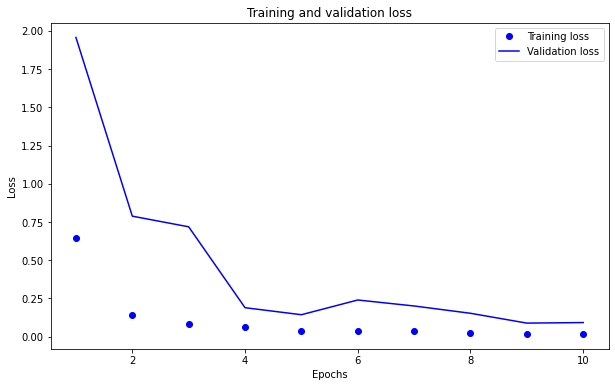

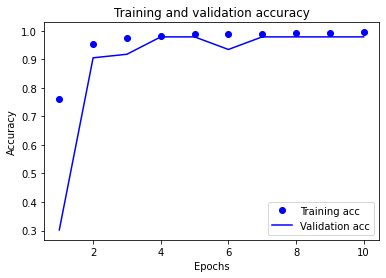

In [27]:
# Build our neural network model with LSTM

from keras import models
from keras import layers

max_features = 25000

from keras.layers import LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 256))
model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.LSTM(128))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Iterate on your training data by calling the fit() method of your model
history = model.fit(X_train_res, y_train_res,
                    epochs=10,
                    batch_size=500,
                   validation_split=0.2)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plot the results of accuracy from the training set and validtion set
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Performance on training set

In [28]:
preds_Y_train = model.predict(X_train)
preds_Y_train =(preds_Y_train>0.5).astype(int)

preds_Y_train = enc.inverse_transform(preds_Y_train)
y_train = enc.inverse_transform(y_train)

accuracy = accuracy_score(y_train, preds_Y_train)
precision = precision_score(y_train, preds_Y_train,average=None) # average=None: The precision scores for each class are returned
recall = recall_score(y_train, preds_Y_train,average=None)
f1 = f1_score(y_train, preds_Y_train,average=None)
c_matrix = confusion_matrix(y_train, preds_Y_train,labels=[-3,-2,-1,0,1,2,3])
print('accuracy: '+str(accuracy)+'\n')
print('precision: '+str(precision)+'\n')
print('recall: '+str(recall)+'\n')
print('F1 score: '+str(f1)+'\n')
print('Confusion matrix: ')
print(c_matrix)

accuracy: 0.9909292268748022

precision: [0.96475771 0.98113208 0.99391029 0.99074074 0.98693964 0.96202532
 1.        ]

recall: [1.         0.99808061 0.99181956 0.98690866 0.99608123 1.
 0.96666667]

F1 score: [0.98206278 0.98953378 0.99286383 0.98882099 0.99148936 0.98064516
 0.98305085]

Confusion matrix: 
[[ 219    0    0    0    0    0    0]
 [   1  520    0    0    0    0    0]
 [   4    5 8487   52    8    1    0]
 [   2    5   52 6634   29    0    0]
 [   1    0    0   10 2796    0    0]
 [   0    0    0    0    0   76    0]
 [   0    0    0    0    0    2   58]]


## Performance on testing set

In [29]:
preds_Y_test = model.predict(X_test)
preds_Y_test =(preds_Y_test>0.5).astype(int)

preds_Y_test = enc.inverse_transform(preds_Y_test)
y_test = enc.inverse_transform(y_test)

accuracy = accuracy_score(y_test, preds_Y_test)
precision = precision_score(y_test, preds_Y_test,average=None) # average=None: The precision scores for each class are returned
recall = recall_score(y_test, preds_Y_test,average=None)
f1 = f1_score(y_test, preds_Y_test,average=None)
c_matrix = confusion_matrix(y_test, preds_Y_test,labels=[-3,-2,-1,0,1,2,3])
print('accuracy: '+str(accuracy)+'\n')
print('precision: '+str(precision)+'\n')
print('recall: '+str(recall)+'\n')
print('F1 score: '+str(f1)+'\n')
print('Confusion matrix: ')
print(c_matrix)

accuracy: 0.8569921957392955

precision: [0.66666667 0.72815534 0.92441594 0.83890954 0.73138298 0.85714286
 1.        ]

recall: [0.77777778 0.65217391 0.93253235 0.81911676 0.75966851 0.66666667
 0.92307692]

F1 score: [0.71794872 0.68807339 0.92845641 0.82889501 0.74525745 0.75
 0.96      ]

Confusion matrix: 
[[  42    3    7    2    0    0    0]
 [   2   75   25    8    5    0    0]
 [   6   11 2018  103   26    0    0]
 [  11    8  111 1354  168    1    0]
 [   2    5   20  146  550    1    0]
 [   0    1    2    1    2   12    0]
 [   0    0    0    0    1    0   12]]


# Model 3 :

3 LSTM layers

In [0]:
enc = OneHotEncoder(sparse=False)
y_train = enc.fit_transform(np.asarray(y_train).reshape(-1, 1))
y_test = enc.transform(np.asarray(y_test).reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/indexed_slices.py:434: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 47919 samples, validate on 11980 samples
Epoch 1/10
47919/47919 [==============================] - 465s 10ms/step - loss: 0.6889 - accuracy: 0.7319 - val_loss: 3.3998 - val_accuracy: 0.2870
Epoch 2/10
47919/47919 [==============================] - 454s 9ms/step - loss: 0.1517 - accuracy: 0.9493 - val_loss: 1.3029 - val_accuracy: 0.6795
Epoch 3/10
47919/47919 [==============================] - 455s 9ms/step - loss: 0.0846 - accuracy: 0.9730 - val_loss: 0.7420 - val_accuracy: 0.9296
Epoch 4/10
47919/47919 [==============================] - 459s 10ms/step - loss: 0.0723 - accuracy: 0.9790 - val_loss: 0.6624 - val_accuracy: 0.9180
Epoch 5/10
47919/47919 [==============================] - 452s 9ms/step - loss: 0.0463 - accuracy: 0.9862 - val_loss: 0.5533 - val_accuracy: 0.9296
Epoch 6/10
47919/47919 [==============================] - 478s 10ms/step - loss: 0.0376 - accuracy: 0.9893 - val_loss: 0.5343 - val_accuracy: 0.9296
Epoch 7/10
47919/47919 [==============================] - 4

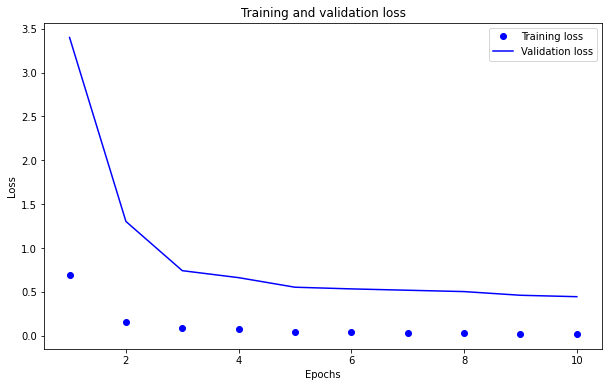

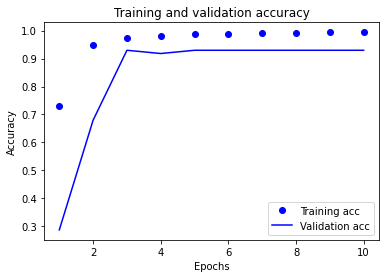

In [31]:
# Build our neural network model with LSTM

from keras import models
from keras import layers

max_features = 25000

from keras.layers import LSTM
model = models.Sequential()
model.add(layers.Embedding(max_features, 256))
model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.LSTM(128,return_sequences=True))
model.add(layers.LSTM(128))
model.add(layers.Dense(7, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Iterate on your training data by calling the fit() method of your model
history = model.fit(X_train_res, y_train_res,
                    epochs=10,
                    batch_size=500,
                   validation_split=0.2)

# plot the results of loss values from the training set and validtion set
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(history_dict['accuracy']) + 1)

plt.figure(figsize=(10,6))
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


# plot the results of accuracy from the training set and validtion set
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## Performance on training set

In [32]:
preds_Y_train = model.predict(X_train)
preds_Y_train =(preds_Y_train>0.5).astype(int)

preds_Y_train = enc.inverse_transform(preds_Y_train)
y_train = enc.inverse_transform(y_train)

accuracy = accuracy_score(y_train, preds_Y_train)
precision = precision_score(y_train, preds_Y_train,average=None) # average=None: The precision scores for each class are returned
recall = recall_score(y_train, preds_Y_train,average=None)
f1 = f1_score(y_train, preds_Y_train,average=None)
c_matrix = confusion_matrix(y_train, preds_Y_train,labels=[-3,-2,-1,0,1,2,3])
print('accuracy: '+str(accuracy)+'\n')
print('precision: '+str(precision)+'\n')
print('recall: '+str(recall)+'\n')
print('F1 score: '+str(f1)+'\n')
print('Confusion matrix: ')
print(c_matrix)

accuracy: 0.9886615335935028

precision: [0.93991416 0.98116761 0.99159468 0.99157134 0.97829891 0.98701299
 1.        ]

recall: [1.         1.         0.99263761 0.98006546 0.99572497 1.
 0.9       ]

F1 score: [0.96902655 0.9904943  0.99211587 0.98578483 0.98693503 0.99346405
 0.94736842]

Confusion matrix: 
[[ 219    0    0    0    0    0    0]
 [   0  521    0    0    0    0    0]
 [   6    5 8494   45    6    1    0]
 [   3    5   71 6588   55    0    0]
 [   0    0    1   11 2795    0    0]
 [   0    0    0    0    0   76    0]
 [   5    0    0    0    1    0   54]]


## Performance on testing set

In [33]:
preds_Y_test = model.predict(X_test)
preds_Y_test =(preds_Y_test>0.5).astype(int)

preds_Y_test = enc.inverse_transform(preds_Y_test)
y_test = enc.inverse_transform(y_test)

accuracy = accuracy_score(y_test, preds_Y_test)
precision = precision_score(y_test, preds_Y_test,average=None) # average=None: The precision scores for each class are returned
recall = recall_score(y_test, preds_Y_test,average=None)
f1 = f1_score(y_test, preds_Y_test,average=None)
c_matrix = confusion_matrix(y_test, preds_Y_test,labels=[-3,-2,-1,0,1,2,3])
print('accuracy: '+str(accuracy)+'\n')
print('precision: '+str(precision)+'\n')
print('recall: '+str(recall)+'\n')
print('F1 score: '+str(f1)+'\n')
print('Confusion matrix: ')
print(c_matrix)

accuracy: 0.8652183083737608

precision: [0.63768116 0.7027027  0.93271889 0.82138728 0.803125   1.
 1.        ]

recall: [0.81481481 0.67826087 0.93530499 0.85964912 0.70994475 0.5
 0.92307692]

F1 score: [0.71544715 0.69026549 0.93401015 0.84008277 0.75366569 0.66666667
 0.96      ]

Confusion matrix: 
[[  44    4    2    4    0    0    0]
 [   1   78   22   11    3    0    0]
 [   6   10 2024  104   20    0    0]
 [  14   14  102 1421  102    0    0]
 [   3    4   18  185  514    0    0]
 [   0    1    2    5    1    9    0]
 [   1    0    0    0    0    0   12]]
